In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tqdm # interactive progress bar

plt.style.use('ggplot')
%matplotlib inline

In [2]:
f_names={'MK':'MK', 'SEGMENT':'Сегмент', 'Service':'Услуга', 'Channeltype': 'Тип канала', 'Source': 'Источник ЕИ', 
'football':'Футбол', 'DECLARED_FAULT':'Заявл. неисправность', 'CREATE_DATE':'Дата создания', 'CLOSETIME':'Дата закрытия',
'all_num_of_repeat':'Всего повторок', 'num_of_repeat2':'Повторок за 2 дня', 'num_of_repeat5':'Повторок за 5 дней',
'num_of_repeat10':'Повторок за 10 дней', 'num_of_repeat30':'Повторок за 30 дней', 'num_of_repeat60':'Повторок за 60 дней',
'MITYPE':'Тип МИ', 'MIPRIORITY':'Приоритет МИ', 'MIIMPACT':'Влияние МИ', 'TECHNICAL_DISTRICT':'Техрайон(WFM)',
'NumWFMforEI':'Кол-во WFM', 'Last_WFM_days_waiting':'Кол-во дней ожидания выезда', 'EIDayOfWeek':'День недели заведения ЕИ',
'EIHourCreate':'Час создания ЕИ'}

In [3]:
# Loading old data
url_to_data = 'data/data2508_fromAug2017.csv'
data = pd.read_csv(url_to_data, names=f_names.keys(), na_values='0', delimiter=';', skiprows=[0])
data.shape

C:\Users\MRekunchak\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(37337, 23)

In [4]:
# Loading fresh data
#!pip install pymysql
import pymysql
import pers_data
import sql_queries

mysql_conn= pymysql.connect(host=pers_data.HOST, 
                port=pers_data.PORT,user=pers_data.USER, passwd=pers_data.PASSWD, 
                db=pers_data.DB, charset='utf8')
#connection.use_unicode =  True

data_y=pd.read_sql(sql_queries.SQL_QUERY_TODAY, con=mysql_conn)
data_y.shape

(1559, 23)

In [5]:
# Data preprocessing

## extract categorical and numerical features for OLD data
categorical_columns_x = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns_x   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Categorical columns: ', categorical_columns_x)
print('Numerical columns: ', numerical_columns_x)

Categorical columns:  ['MK', 'SEGMENT', 'DECLARED_FAULT', 'CREATE_DATE']
Numerical columns:  ['Service', 'Channeltype', 'Source', 'football', 'CLOSETIME', 'all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI', 'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate']


In [6]:
## extract categorical and numerical features for FRESH data
categorical_columns_y = [c for c in data_y.columns if data_y[c].dtype.name == 'object']
numerical_columns_y   = [c for c in data_y.columns if data_y[c].dtype.name != 'object']
print('Categorical columns: ', categorical_columns_y)
print('Numerical columns: ', numerical_columns_y)

Categorical columns:  ['MK', 'SEGMENT', 'DECLARED_FAULT']
Numerical columns:  ['Service', 'Channeltype', 'Source', 'football', 'CREATE_DATE', 'CLOSETIME', 'all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY', 'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI', 'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate']


In [7]:
# data[numerical_columns_x].describe()

In [8]:
# data_y[numerical_columns_y].describe()

In [9]:
data[categorical_columns_x].describe() # Stats for categorial features for OLD data

,MK,SEGMENT,DECLARED_FAULT,CREATE_DATE
count,37073,37312,37337,37337
unique,27,7,225,36618
top,ФЛ,МР,"Телефония. Тишина в трубке, нет зуммера",1502701943
freq,28426,29327,4016,3


In [10]:
data_y[categorical_columns_y].describe() # Stats for categorial features for FRESH data

,MK,SEGMENT,DECLARED_FAULT
count,1559,1559,1559
unique,21,7,118
top,ФЛ,МР,"Телефония. Тишина в трубке, нет зуммера"
freq,1173,1206,226


In [11]:
## Legends
LEGEND={'Channeltype':{
'9207':'Медная линия',
'9205':'Канальная АТШ',
'9204': 'Канальная PON',
'9986':'Канальная Radio',
'9206':'Кодер видеонаблюдения',
'9636':'IP ОПС',
'9987':'Канальная Радио (юрики)',
'9203':'Канал ADSL',
'9633':'Канальная FTTB',
'9632':'ОПС',
'9202':'Камера видеонаблюдения',
'10769':'Канальная МЕДЬ',
'9197':'RFC PON',
'9198':'RFC АТШ',
'9199':'Интернет PON',
'9200':'Интернет АТШ',
'9201':'Интернет АТШ (юрики)',
'9208':'Телевидение PON',
'9209':'Телевидение АТШ',
'9210':'Телефон PON',
'9211':'Телефон АТШ',
'9212':'УПАТС PON',
'9630':'Телефон FTTB',
'9631':'Телевидение FTTB',
'9634':'Интернет FTTB',
'9635':'RFC FTTB'},
'Service':{
'9650':'Все сервисы',
'9697':'ОПС',
'8677':'Не сетевой инцидент',
'8679':'Телевидение',
'8681':'Технологические сервисы',
'8676':'Дополнительные сервисы',
'8678':'Передача данных',
'8680':'Телефония',
'8682':'Энергетическое и климатическое обеспечение технологических площадок'}}

In [12]:
## Replacement of digital values of categories by their number of repetitions in data
# TODO: need to replace occurence of categories to some more appropriate for expression categories in data
stats_x=dict()
stats_y=dict()

for i in ['MK', 'SEGMENT', 'DECLARED_FAULT', 'Service', 'Channeltype', 'football', 'TECHNICAL_DISTRICT',
          'EIDayOfWeek', 'EIHourCreate']:
    stats_x[i]=data[i].value_counts()
    stats_y[i]=data[i].value_counts() # not data_y!!!!!! Because it's occurrence of categories
    

# print(stats.keys())
# print(stats['Service'])
# stats_x['MK'].values
stats_y['Service'],stats_x['Service']

(8678.0    19202
 8680.0     9642
 9650.0     4480
 8679.0     3848
 8677.0       92
 8681.0       42
 8676.0       28
 8682.0        2
 Name: Service, dtype: int64, 8678.0    19202
 8680.0     9642
 9650.0     4480
 8679.0     3848
 8677.0       92
 8681.0       42
 8676.0       28
 8682.0        2
 Name: Service, dtype: int64)

In [13]:
LEGEND['Channeltype'].keys()

dict_keys(['9207', '9205', '9204', '9986', '9206', '9636', '9987', '9203', '9633', '9632', '9202', '10769', '9197', '9198', '9199', '9200', '9201', '9208', '9209', '9210', '9211', '9212', '9630', '9631', '9634', '9635'])

In [14]:
## Notes for understanding of features
cat_features=set()
for feature in sorted(stats_x.keys()):
    d_first=20
#     print(len(stats[feature]))
    if len(stats_x[feature])< 20:
        d_first = len(stats_x[feature])
    print("\n"+feature+"\n")
    for i in stats_x[feature].keys()[:d_first]:
        if type(i) == str:
            print(stats_x[feature][i], "\t", i)
        else:
            cat_features.add(feature)
# print(cat_features)
if cat_features:
    for feature in cat_features:
        try:
            if LEGEND[feature]:
            
                print("\n", feature, "\n")
                for i in stats_x[feature].keys():
                    print(stats_x[feature][i], "\t", LEGEND[feature][str(int(i))])
        except:
                pass
#     print(stats[feature].keys()[:d_first], stats[feature].values[:d_first])
    


Channeltype


DECLARED_FAULT

4016 	 Телефония. Тишина в трубке, нет зуммера
2809 	 ONT не на линии. Проблема с оптическим кабелем
2556 	 Телефония. Тишина в трубке
2381 	 Интернет. Не работает интернет
1642 	 Не работает ONT. Нет индикации питания.
1505 	 Интернет. Не открываются все страницы
1463 	 ТВ. Не получен IP-адрес
1195 	 ТВ. Черный или синий экран
890 	 ТВ. Проблемы с пультом
779 	 Интернет. Другое
779 	 Swap ONT Huawei
722 	 Перенос/замена модели ONT
721 	 Телефония. Зуммер занято
697 	 SLX_Не работает INTERNET
695 	 ONT на линии. Высокое затухание
672 	 Интернет. Не открываются страницы
661 	 ТВ. Рассыпание/замирание
653 	 ТВ. Другое
536 	 Нет трансляции на портале
533 	 Интернет. Нет линка

EIDayOfWeek


EIHourCreate


MK

28426 	 ФЛ
2865 	 SOHO
842 	 NKA
801 	 Выделенное обслуживание (пилот)
732 	 GS-SLA4
672 	 SME
584 	 Оператор
416 	 SME GS
350 	 Corporate
213 	 KA
209 	 SOHO_GS
182 	 GS-SLA1
146 	 Corporate GS
137 	 GS-Имидж абоненты
111 	 Имидж-абоненты (физические л

In [15]:
# stats_y['SEGMENT'][:6].plot()
# data.head()
# for i in data_x:
#     print(data[i].describe())

In [16]:
## Cleaning the data

# dropped_data_without_empty_cols = data.dropna(axis=1)
# dropped_data_without_empty_rows = data.dropna(axis=0)
# data.count(axis=0)


for item in ['all_num_of_repeat', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10', 'num_of_repeat30', 'num_of_repeat60']:
    data[item]=data[item][data[item].isin([i for i in range(1000)] + [str(i) for i in range(1000)])]
    data[item]=data[item].replace(to_replace=[np.nan], value=[0])

    data_y[item]=data_y[item][data_y[item].isin([i for i in range(1000)] + [str(i) for i in range(1000)])]
    data_y[item]=data_y[item].replace(to_replace=[np.nan], value=[0])

    

# for col_name in ['SERVICE', 'channeltype', 'source']:
#     data[col_name]=data[col_name].replace(to_replace=[np.nan], value=[0])
#     data[col_name]=data[col_name].replace(to_replace=data[col_name].unique(), value=[i for i in range(len(data[col_name].unique()))])



# data['DECLARED_FAULT']=data['DECLARED_FAULT'].replace(to_replace=data['DECLARED_FAULT'].unique(), value=[i for i in range(1,len(data['DECLARED_FAULT'].unique())+1)]) 

# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'][data['CLIENT_CATEGORY'].isin(['ФЛ', 'SOHO', 'NKA', 
# 'Выделенное обслуживание (пилот)', 'GS-SLA4', 'SME', 'Оператор', 'SME GS', 'Corporate', 'KA', 'SOHO_GS', 'GS-SLA1', 
# 'Corporate GS', 'GS-Имидж абоненты', 'Имидж-абоненты (физические лица)', 'GS-SLA3', 'INDIVIDUAL', 'KA GS', 'ФЛ_ИЗ_МРМ',
# 'Развитие', 'СПЕЦ', 'Внутренний', 'Посольства', 'Имидж-абоненты (юридические лица)', 'NKA GS'])]
# data['CLIENT_CATEGORY']=data['CLIENT_CATEGORY'].replace(to_replace=data['CLIENT_CATEGORY'].unique(), value=[i for i in range(1,len(data['CLIENT_CATEGORY'].unique())+1)]) 

# data['SEGMENT']=data['SEGMENT'][data['SEGMENT'].isin(['МР','КОРП','ГОС','Оператор','БС28','Внутренний','БС22'])]
# data['SEGMENT']=data['SEGMENT'].replace(to_replace=data['SEGMENT'].unique(), value=[i for i in range(1,len(data['SEGMENT'].unique())+1)]) 


data['DECLARED_FAULT']=data['DECLARED_FAULT'].map(data.groupby('DECLARED_FAULT').size())
data_y['DECLARED_FAULT']=data_y['DECLARED_FAULT'].map(data_y.groupby('DECLARED_FAULT').size())

data['MK']=data['MK'].map(data.groupby('MK').size())
data_y['MK']=data_y['MK'].map(data_y.groupby('MK').size())

data['SEGMENT']=data['SEGMENT'].map(data.groupby('SEGMENT').size())
data_y['SEGMENT']=data_y['SEGMENT'].map(data_y.groupby('SEGMENT').size())



for i in ['CREATE_DATE', 'CLOSETIME']:
    data[i] = pd.to_numeric(data[i],errors='coerce')
    data_y[i] = pd.to_numeric(data_y[i],errors='coerce')

In [17]:
# data['MK'], data_y['MK']

In [18]:
# data['CREATE_DATE'].unique(), data_y['CREATE_DATE'].unique()

In [19]:
# type(data_y['CREATE_DATE'].head()[1])

In [20]:
## Generation of data
data['decision_time'] = data['CLOSETIME']-data['CREATE_DATE']
data_y['decision_time'] = data_y['CLOSETIME']-data_y['CREATE_DATE']

In [21]:
# data_y['SEGMENT'].head()

In [22]:
## Selecting data
# sel_data = pd.concat((data['CLIENT_CATEGORY'],
# data['SEGMENT'],
# data['SERVICE'],
# data['channeltype'],
# data['source'],
# # data['CHANNELREQUESTID'],
# data['football'],
# data['DECLARED_FAULT'],
# data['all_num_of_repeat'],
# data['num_of_repeat2'],
# data['num_of_repeat5'],
# data['num_of_repeat10'],
# data['num_of_repeat30'],
# data['num_of_repeat60'],
# data['CREATE_DATE'],
# data['CLOSETIME'],
# data['decision_time'],
# # data['TIMELEFTSLA']
#                      ), axis=1)
# sel_data.describe()

In [23]:
print(data_y['football'].unique()[2])
# for i in sel_data['SERVICE']:
#     if i.startswith('2'):
#         pass
#     else:
#         print(i)

6


In [24]:
# # full list of categorical columns, where 'nan' is missing values
# for c in sel_data:
#     print(c, sel_data[c].unique(), len(sel_data[c].unique()))

In [25]:
# # for each numerical/quantitative feature built histogram,
# # for each pair of nemerical built dispersion (scattering) diagram
# from pandas.plotting import scatter_matrix
# scatter_matrix(data, alpha=0.05, figsize=(15, 15));

In [26]:
# data[numerical_columns_x].corr() # matrix of correlations for OLD data
# data_y[numerical_columns_y].corr() # matrix of correlations for FRESH data

In [27]:
## Find the number of completed (not skipped) items
# axis = 0 means that we move counter from top to bottom, and axis = 1 than we move counter from left to right
data.count(axis=0), data_y.count(axis=0)

(MK                       37073
 SEGMENT                  37312
 Service                  37336
 Channeltype              33451
 Source                   37337
 football                 37318
 DECLARED_FAULT           37337
 CREATE_DATE              37336
 CLOSETIME                35158
 all_num_of_repeat        37337
 num_of_repeat2           37337
 num_of_repeat5           37337
 num_of_repeat10          37337
 num_of_repeat30          37337
 num_of_repeat60          37337
 MITYPE                    2384
 MIPRIORITY                1734
 MIIMPACT                  1717
 TECHNICAL_DISTRICT       23261
 NumWFMforEI              23261
 Last_WFM_days_waiting    15669
 EIDayOfWeek              37336
 EIHourCreate             37021
 decision_time            35157
 dtype: int64, MK                       1559
 SEGMENT                  1559
 Service                  1559
 Channeltype              1414
 Source                   1559
 football                 1559
 DECLARED_FAULT           1559
 

In [28]:
## fill the missing values
# fill all numerical features (Instead of gaps (missing values), we substitute the median values (data.median(axis=0)))
data = data.fillna(0, axis=0)
data_y = data_y.fillna(0, axis=0)

In [29]:
# before
# data['A1'].describe()

In [30]:
# # fill the missing values in categorical feature with top value (Instead missing values) we substitute 
# # the top value in this column
# data['A1'] = data['A1'].fillna('b')

In [31]:
# result
data_y.describe()

,MK,SEGMENT,Service,Channeltype,Source,football,DECLARED_FAULT,CREATE_DATE,CLOSETIME,all_num_of_repeat,...,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate,decision_time
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1.559000e+03,1.559000e+03,1559.000000,...,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.0,1559.000000,1559.000000
mean,897.041052,988.896087,8800.918538,8412.842207,8698.985247,2.922386,75.079538,1.504001e+09,4.370203e+08,1.861450,...,1.169981,0.173188,0.248236,0.238614,20.786402,0.604233,-0.311097,3.0,12.581142,2524.106479
std,481.878169,404.132677,322.084989,2709.306698,379.916864,1.388012,75.949007,1.117696e+04,6.830765e+08,2.336581,...,0.893550,0.501115,0.823645,0.811200,18.642469,0.527067,4.359055,0.0,3.102805,6394.736586
min,1.000000,1.000000,8676.000000,0.000000,6026.000000,1.000000,1.000000,1.503954e+09,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,3.0,0.000000,0.000000
25%,1173.000000,1206.000000,8678.000000,9204.000000,8750.000000,2.000000,15.000000,1.503994e+09,0.000000e+00,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.000000,0.000000
50%,1173.000000,1206.000000,8679.000000,9204.000000,8750.000000,2.000000,37.000000,1.504001e+09,0.000000e+00,1.000000,...,1.000000,0.000000,0.000000,0.000000,26.000000,1.000000,0.000000,3.0,13.000000,0.000000
75%,1173.000000,1206.000000,8680.000000,9205.000000,8750.000000,3.000000,124.000000,1.504010e+09,1.503995e+09,2.000000,...,1.000000,0.000000,0.000000,0.000000,39.000000,1.000000,1.000000,3.0,15.000000,789.000000
max,1173.000000,1206.000000,9650.000000,10769.000000,10867.000000,13.000000,226.000000,1.504019e+09,1.504019e+09,36.000000,...,15.000000,2.000000,5.000000,4.000000,64.000000,5.000000,2.000000,3.0,18.000000,63401.000000


In [32]:
# try:
#     data_describe = data.describe(include=[object])
#     data_describe
# except:
#     pass

In [33]:
# for c in categorical_columns:
#     data[c] = data[c].fillna(data_describe[c]['top'])
# data.describe(include=[object])

In [34]:
# data['DECLARED_FAULT'].unique()

In [35]:
# # devide categorical (non-numerical) columns to binary and nonbinary
# binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
# nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
# print(binary_columns, nonbinary_columns)


In [36]:
# # for non-binary columns|features vectorizing is 1) divide each column to the numbers of unique values in the column
# # 2) and if value exist then only one column's row filled like 1
# # for example, column A4 have 3 unique values: print(data['A4'].unique()) => ['u' 'y' 'l']
# # create 3 new columns: 4_u, A4_y, A4_l
# # If A4 value is 'u', then A4_u = 1, A4_y = 0, A4_l = 0, etc.
# # In Pandas it's performed via using .get_dummies method.

# data_nonbinary = pd.get_dummies(data[nonbinary_columns[6:8]], columns=None) # !!!!!! Limitation 6:10!!!!!!!!!1
# data_nonbinary.columns

In [37]:
# data = data_nonbinary
# data = pd.DataFrame(data, dtype=float)
# print(data.shape)
# print(data.columns)

In [38]:
## Normalization
data_numerical_x = data[numerical_columns_x]
data_numerical_x = (data_numerical_x - data_numerical_x.mean()) / data_numerical_x.std()

data_numerical_y = data_y[numerical_columns_y]
data_numerical_y = (data_numerical_y - data_numerical_y.mean()) / data_numerical_y.std()

# data_numerical_x.describe()
data_numerical_y.describe()

,Service,Channeltype,Source,football,CREATE_DATE,CLOSETIME,all_num_of_repeat,num_of_repeat2,num_of_repeat5,num_of_repeat10,num_of_repeat30,num_of_repeat60,MITYPE,MIPRIORITY,MIIMPACT,TECHNICAL_DISTRICT,NumWFMforEI,Last_WFM_days_waiting,EIDayOfWeek,EIHourCreate
count,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,1.559000e+03,0.0,1.559000e+03
mean,-4.415967e-16,2.332252e-16,2.697436e-15,1.442791e-15,-1.001517e-11,2.492625e-15,-5.106029e-17,5.401922e-16,4.692099e-16,-4.291432e-16,-1.270632e-16,-1.934167e-16,6.486864e-16,4.868887e-16,-3.294350e-16,5.398005e-17,4.687292e-16,2.047397e-19,NaN,-4.669631e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00
min,-3.878434e-01,-3.105164e+00,-7.035711e+00,-1.384992e+00,-4.210275e+00,-6.397823e-01,-7.966553e-01,-2.583312e+00,-2.424476e+00,-2.222694e+00,-1.690997e+00,-1.309363e+00,-3.456051e-01,-3.013873e-01,-2.941499e-01,-1.115003e+00,-1.146407e+00,-6.352043e+00,NaN,-4.054764e+00
25%,-3.816339e-01,2.920149e-01,1.342787e-01,-6.645374e-01,-6.471411e-01,-6.397823e-01,-3.686796e-01,1.884591e-01,1.208156e-01,3.917280e-02,-1.133403e-01,-1.902309e-01,-3.456051e-01,-3.013873e-01,-2.941499e-01,-1.115003e+00,-1.146407e+00,7.136796e-02,NaN,-5.095847e-01
50%,-3.785291e-01,2.920149e-01,1.342787e-01,-6.645374e-01,-3.942925e-03,-6.397823e-01,-3.686796e-01,1.884591e-01,1.208156e-01,3.917280e-02,-1.133403e-01,-1.902309e-01,-3.456051e-01,-3.013873e-01,-2.941499e-01,2.796625e-01,7.508844e-01,7.136796e-02,NaN,1.349934e-01
75%,-3.754243e-01,2.923839e-01,1.342787e-01,5.591727e-02,7.946642e-01,1.562013e+00,5.929619e-02,1.884591e-01,1.208156e-01,3.917280e-02,-1.133403e-01,-1.902309e-01,-3.456051e-01,-3.013873e-01,-2.941499e-01,9.769950e-01,7.508844e-01,3.007755e-01,NaN,7.795715e-01
max,2.636203e+00,8.696534e-01,5.706550e+00,7.260464e+00,1.635412e+00,1.562049e+00,1.461047e+01,5.732002e+00,5.211398e+00,4.562906e+00,1.250792e+01,1.547762e+01,3.645494e+00,5.769191e+00,4.636815e+00,2.318019e+00,8.340050e+00,5.301830e-01,NaN,1.746439e+00


In [39]:
# data_numerical_x.head()

In [40]:
## For data
X = data.drop(['all_num_of_repeat','CLOSETIME', 'CREATE_DATE'], axis=1)  
y = data['all_num_of_repeat']
feature_names = X.columns
print(feature_names)
fsel_names={'decision_time':'Время решения'}
for i in feature_names:
    if i!= 'decision_time':
        fsel_names[i]=f_names[i]
# fsel_names

Index(['MK', 'SEGMENT', 'Service', 'Channeltype', 'Source', 'football',
       'DECLARED_FAULT', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10',
       'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY',
       'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI',
       'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate',
       'decision_time'],
      dtype='object')


In [41]:
## For data_y
X_y = data_y.drop(['all_num_of_repeat','CLOSETIME', 'CREATE_DATE'], axis=1)  
y_y = data_y['all_num_of_repeat']
feature_names_y = X_y.columns
print(feature_names_y)
fsel_names_y={'decision_time':'Время решения'}
for i in feature_names_y:
    if i!= 'decision_time':
        fsel_names_y[i]=f_names[i]
# fsel_names

Index(['MK', 'SEGMENT', 'Service', 'Channeltype', 'Source', 'football',
       'DECLARED_FAULT', 'num_of_repeat2', 'num_of_repeat5', 'num_of_repeat10',
       'num_of_repeat30', 'num_of_repeat60', 'MITYPE', 'MIPRIORITY',
       'MIIMPACT', 'TECHNICAL_DISTRICT', 'NumWFMforEI',
       'Last_WFM_days_waiting', 'EIDayOfWeek', 'EIHourCreate',
       'decision_time'],
      dtype='object')


In [42]:
print(X.shape)
print(y.shape)
N, d = X.shape
print(X_y.shape)
print(y_y.shape)
N_y, d_y = X_y.shape

(37337, 21)
(37337,)
(1559, 21)
(1559,)


In [43]:
%%time
## Devide for train and test samples for OLD data
from sklearn.model_selection import train_test_split
X_train, X_test_x, y_train, y_test_x = train_test_split(X, y, test_size = 0.0, random_state = 11) # obviously test_size=


## Devide for train and test samples for FRESH data
from sklearn.model_selection import train_test_split
X_train_y, X_test, y_train_y, y_test = train_test_split(X_y, y_y, test_size = 0.9999999999999999, random_state = 11) # obviously test_size=


N_train_y, _ = X_train.shape 
N_test_y,  _ = X_test.shape 
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)
# print(N_train_y, N_test_y)
# X_train, y_train is a training sample, X_test, y_test is a test sample.

37337 1559
Wall time: 6.52 s


In [44]:
%%time
# Teach the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Wall time: 959 ms


In [45]:
%%time
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.366017623269 0.442591404747
Wall time: 3.8 s


In [46]:
%%time
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15, 20, 40, 60, 235]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Users\MRekunchak\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.443126121542 40
Wall time: 2min 11s


In [47]:
%%time
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.432868200445 0.699166132136
Wall time: 6.22 s


In [48]:
# %%time
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [49]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# gamma_array = np.logspace(-5, 2, num=8)
# svc = SVC(kernel='rbf')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'n'})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)

In [50]:
# %%time
# svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# # err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [51]:
# %%time
# from sklearn.model_selection import GridSearchCV
# C_array = np.logspace(-3, 3, num=7)
# svc = SVC(kernel='linear')
# grid = GridSearchCV(svc, param_grid={'C': C_array})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)

In [52]:
# %%time
# svc = SVC(kernel='linear', C=grid.best_estimator_.C)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [53]:
# %%time
# from sklearn.grid_search import GridSearchCV
# C_array = np.logspace(-5, 2, num=8)
# gamma_array = np.logspace(-5, 2, num=8)
# degree_array = [2, 3, 4]
# svc = SVC(kernel='poly')
# grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
# grid.fit(X_train, y_train)
# print('CV error    = ', 1 - grid.best_score_)
# print('best C      = ', grid.best_estimator_.C)
# print('best gamma  = ', grid.best_estimator_.gamma)
# print('best degree = ', grid.best_estimator_.degree)

In [54]:
# %%time
# svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
#           gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
# svc.fit(X_train, y_train)

# err_train = np.mean(y_train != svc.predict(X_train))
# err_test  = np.mean(y_test  != svc.predict(X_test))
# print(err_train, err_test)

In [55]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=45, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.000910624849345 0.302116741501
Wall time: 5.73 s


In [149]:
## Predict RepeatIncidents with model using and associate data with EI numbers
res=pd.Series(rf.predict(X_test))
# print(X_test.loc[624])
important_items=res.sort_values()[-25:]


important_items_CREATE_DATE=[]
for i in important_items.index:
    important_items_CREATE_DATE.append(data_y.loc[i,'CREATE_DATE'])
#     print(data_y.loc[i,'CREATE_DATE'], data_y.loc[i,'football'], important_items[i])

x=dict()
for i in range(len(important_items)-1):
    x[i]=important_items_CREATE_DATE[i]
mysql_conn= pymysql.connect(host=pers_data.HOST, 
                port=pers_data.PORT,user=pers_data.USER, passwd=pers_data.PASSWD, 
                db=pers_data.DB, charset='utf8')
#connection.use_unicode =  True
result_of_selection=pd.read_sql(sql_queries.SQL_QUERY_FIND_EIs.format(tuple(important_items_CREATE_DATE)), con=mysql_conn)
# for i in result_of_selection[['REQUEST_ID', 'STATUS', 'CREATE_DATE']]:
#     if result_of_selection['CREATE_DATE']==important_items.values:
#         print(result_of_selection['CREATE_DATE'])
# important_items.values
res_of_union=pd.concat([result_of_selection, pd.DataFrame(important_items.values)], axis=1)
res_of_union.rename(columns={0:'RepeatForecast'}, inplace=True)
res_of_union[['REQUEST_ID', 'RepeatForecast', 'CREATE_DATE']].sort_values('RepeatForecast', ascending=False)

,REQUEST_ID,RepeatForecast,CREATE_DATE
24,4085491,23.0,1504014871
23,4085341,16.0,1504013831
22,4084504,16.0,1504010075
21,4084355,11.0,1504009269
20,4084226,9.0,1504008338
19,4084151,8.0,1504008119
18,4083176,6.0,1504003856
13,4082076,5.0,1503998195
17,4083016,5.0,1504003406
16,4082560,5.0,1504000597


In [116]:
data_y.loc[624,'CREATE_DATE']

1503998047

In [204]:
#!pip install sqlalchemy

from sqlalchemy import create_engine
import datetime
# import importlib
# importlib.reload(pers_data)

def write_to_sql(res_of_union, model_name):
    ## Write to MySQL to new table


    engine = create_engine('mysql+pymysql://'+pers_data.ACCOUNT_FOR_WRITE_TO_SQL)



    res_of_union=res_of_union[['REQUEST_ID', 'RepeatForecast', 'CREATE_DATE']].sort_values('RepeatForecast', ascending=False)
    res_of_union['Model']=model_name
    table_name = 'FORECASTS'+'_'+model_name+'_'+str(datetime.datetime.today().month)+'_'+str(datetime.datetime.today().day)
    pd.DataFrame.to_sql(res_of_union, name=table_name, con=engine, if_exists='replace')

In [205]:
write_to_sql(res_of_union, 'rf')

In [140]:
%%time
rfr = ensemble.RandomForestRegressor(n_estimators=45, random_state=11)
rfr.fit(X_train, y_train)

err_train = np.mean(y_train != rfr.predict(X_train))
err_test  = np.mean(y_test  != rfr.predict(X_test))
print(err_train, err_test)

0.821731794199 0.895445798589
Wall time: 9.83 s


In [141]:
%%time
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'num_of_repeat60' (0.1758)
 2. feature 'decision_time' (0.1446)
 3. feature 'num_of_repeat30' (0.1160)
 4. feature 'EIHourCreate' (0.0952)
 5. feature 'TECHNICAL_DISTRICT' (0.0810)
 6. feature 'DECLARED_FAULT' (0.0807)
 7. feature 'EIDayOfWeek' (0.0640)
 8. feature 'Channeltype' (0.0435)
 9. feature 'football' (0.0344)
10. feature 'MK   ' (0.0249)
11. feature 'num_of_repeat10' (0.0242)
12. feature 'Last_WFM_days_waiting' (0.0234)
13. feature 'Service' (0.0223)
14. feature 'Source' (0.0181)
15. feature 'num_of_repeat5' (0.0142)
16. feature 'NumWFMforEI' (0.0111)
17. feature 'SEGMENT' (0.0097)
18. feature 'num_of_repeat2' (0.0075)
19. feature 'MITYPE' (0.0039)
20. feature 'MIIMPACT' (0.0026)
21. feature 'MIPRIORITY' (0.0025)
Wall time: 22 ms


In [142]:
feature_arr_names = [i for i in fsel_names.values()]
np.array(feature_arr_names)[:d_first]
# d_first

array(['Время решения', 'MK', 'Сегмент', 'Услуга', 'Тип канала',
       'Источник ЕИ', 'Футбол', 'Заявл. неисправность',
       'Повторок за 2 дня', 'Повторок за 5 дней', 'Повторок за 10 дней',
       'Повторок за 30 дней', 'Повторок за 60 дней', 'Тип МИ',
       'Приоритет МИ', 'Влияние МИ', 'Техрайон(WFM)', 'Кол-во WFM',
       'Кол-во дней ожидания выезда', 'День недели заведения ЕИ'], 
      dtype='<U27')

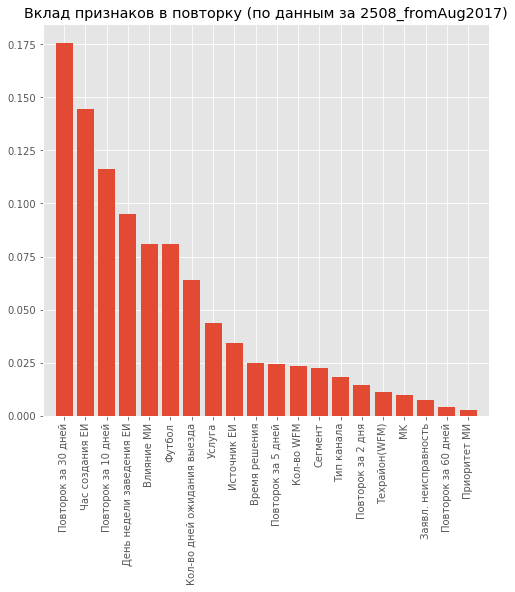

In [143]:
# %%time

data_period = url_to_data.split('.')[0].split('/')[1][4:]

plt.subplots_adjust(left=0.15)
d_first = 20
plt.figure(figsize=(8, 8)).autofmt_xdate() 
plt.title("Вклад признаков в повторку (по данным за {0})".format(data_period))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_arr_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])
plt.savefig("FeaturesImportances{0}.pdf".format(data_period))

In [144]:
%%time
print(len(feature_names))
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

21
Index(['num_of_repeat60', 'decision_time', 'num_of_repeat30', 'EIHourCreate',
       'TECHNICAL_DISTRICT', 'DECLARED_FAULT', 'EIDayOfWeek', 'Channeltype'],
      dtype='object')
Wall time: 0 ns


In [145]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators=25, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)

0.293756863165 0.288005131495
Wall time: 1min


In [206]:
## Predict RepeatIncidents with model using and associate data with EI numbers
res=pd.Series(gbt.predict(X_test[best_features_names]))
# print(X_test.loc[624])
important_items=res.sort_values()[-25:]


important_items_CREATE_DATE=[]
for i in important_items.index:
    important_items_CREATE_DATE.append(data_y.loc[i,'CREATE_DATE'])
    print(data_y.loc[i,'CREATE_DATE'], data_y.loc[i,'football'], important_items[i])

x=dict()
for i in range(len(important_items)-1):
    x[i]=important_items_CREATE_DATE[i]
mysql_conn= pymysql.connect(host=pers_data.HOST, 
                port=pers_data.PORT,user=pers_data.USER, passwd=pers_data.PASSWD, 
                db=pers_data.DB, charset='utf8')
#connection.use_unicode =  True
result_of_selection=pd.read_sql(sql_queries.SQL_QUERY_FIND_EIs.format(tuple(important_items_CREATE_DATE)), con=mysql_conn)
# for i in result_of_selection[['REQUEST_ID', 'STATUS', 'CREATE_DATE']]:
#     if result_of_selection['CREATE_DATE']==important_items.values:
#         print(result_of_selection['CREATE_DATE'])
# important_items.values
res_of_union=pd.concat([result_of_selection, pd.DataFrame(important_items.values)], axis=1)
res_of_union.rename(columns={0:'RepeatForecast'}, inplace=True)
res_of_union[['REQUEST_ID', 'RepeatForecast', 'CREATE_DATE']].sort_values('RepeatForecast', ascending=False)

1503992124 2 4.0
1504008119 2 4.0
1503981721 4 5.0
1504001952 3 5.0
1503996021 3 5.0
1504009269 2 5.0
1503982946 2 5.0
1503993970 4 8.0
1503993912 4 8.0
1503991268 5 8.0
1503987457 1 8.0
1503995003 2 8.0
1504019266 2 8.0
1504006328 2 10.0
1503990573 2 11.0
1503993528 2 12.0
1503995527 2 12.0
1503996528 2 12.0
1504003860 3 12.0
1504000597 2 12.0
1504000588 4 12.0
1504010075 4 12.0
1503984934 2 16.0
1504013831 4 34.0
1503992532 4 94.0


,REQUEST_ID,RepeatForecast,CREATE_DATE
24,4086186,94.0,1504019266
23,4085341,34.0,1504013831
22,4084504,16.0,1504010075
21,4084355,12.0,1504009269
20,4084151,12.0,1504008119
19,4083729,12.0,1504006328
18,4083177,12.0,1504003860
17,4082807,12.0,1504001952
16,4082560,12.0,1504000597
15,4082609,12.0,1504000588


In [207]:
write_to_sql(res_of_union, 'gbt')